Bransolle Line,
 Gilibert Rémy,
 Raë Jolhan,
 Sénécaille Cassandra.


#Projet Sciences des données

### Le dérèglement et la vulnérabilité climatique des pays en 2016




On importe le fichier 'BD.csv' qui regroupe toutes nos données

In [ ]:
import pandas as pd

data = pd.read_csv("BD.csv", sep=";")
data.head()

,Country,ISO,Flooding due to sea level rise or melting glaciers,Increasing Aridity,Rainfall,Temperature,Storms,PVCCI,Rank,emission_CO2,pop
0,Afghanistan,AFG,43.818000,78.880582,81.301300,55.241707,0.000000,59.671955,42,9067598.0,34636207.0
1,Angola,AGO,0.168429,45.003669,70.727480,74.774093,0.000000,50.237237,112,27209698.0,29154746.0
2,Anguilla,AIA,66.419144,37.052247,68.038189,71.981394,52.594505,60.598795,38,153888.0,NaN
3,Albania,ALB,4.878857,38.213002,69.810138,48.325404,0.000000,41.696131,184,4631977.0,2876101.0
4,Andorra,AND,0.000000,47.755201,71.845496,51.545351,0.000000,44.942759,167,468992.0,72540.0


## 1 - Graphique camembert représentant les 6 pays les plus et les moins vulnérables aux changements environnementaux.

Graphique fait par Line Bransolle

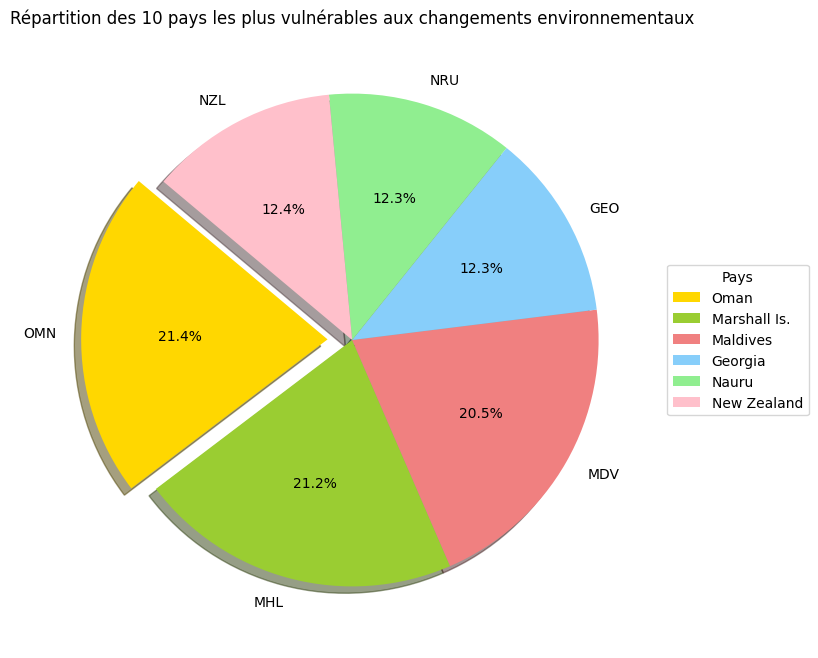

In [ ]:
import matplotlib.pyplot as plt

# Tri du DataFrame en fonction de la colonne "PVCCI" en ordre décroissant, on choisit les 3 premières lignes
premieres_lignes = data.sort_values(by="PVCCI", ascending=False).head(3)

# Tri du DataFrame en fonction de la colonne "PVCCI" en ordre croissant, on choisit les 3 premières lignes
dernieres_lignes = data.sort_values(by="PVCCI", ascending=True).head(3)

# Fusionner les 5 premières lignes et les 5 dernières lignes
classement = pd.concat([premieres_lignes, dernieres_lignes])

# Données pour le camembert
labels = classement["ISO"]
legende = classement["Country"]
values = classement["PVCCI"]  #

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'lightblue', 'lightgray', 'lightyellow', 'lightpink']

# Création du camembert
fig, ax = plt.subplots(figsize=(8, 8))

# Faire ressortir la valeur la plus haute
explode = (0.1, 0, 0, 0, 0, 0)

# Afficher le camembert avec pourcentages et couleurs personnalisées
list_tranche, list_label, list_per = ax.pie(values, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)

# Légende
ax.legend(list_tranche, legende, title="Pays", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Titre
ax.set_title('Répartition des 10 pays les plus vulnérables aux changements environnementaux')

# Afficher le camembert
plt.show()

## 2 - Graphique à barres horizontales des inondations en fonction de la température


Graphique fait par Jolhan Raë

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd


# Sélectionner les 10 pays avec les températures les plus froides
top_10_countries_faible= data.nsmallest(10, 'Temperature')

# Extraire les valeurs des température pour ces 10 pays
xgraphT = top_10_countries_faible['Temperature']

# Extraire les valeurs d'inondation pour ces 10 pays
xgraphF = top_10_countries_faible['Flooding due to sea level rise or melting glaciers']

# Créer un subplot avec deux graphiques
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True, shared_yaxes=False, vertical_spacing=0.001)

# Ajouter le graphique pour les inondations
fig.append_trace(go.Bar(
    x=xgraphF,   # On place en x les valeurs d'inondations des pays sélectionnés
    y=top_10_countries_faible['Country'],  # On place en y les pays sélectionnés
    marker=dict(
        color='rgba(50, 171, 96, 0.3)',   # On contrôle la couleur des barres
        line=dict(
            color='rgba(50, 171, 96, 1.0)', # On contrôle la couleur des bordures des barres
            width=1),  # La largueur ici
    ),
    name='Inondations dues a l augmentation des fontes de glaces ', # On rajoute un nom à la légende
    orientation='h',
), 1, 1) # On indique que ce graphique ce trouve en première ligne première colonne

# Ajouter le graphique pour les températures
fig.append_trace(go.Scatter(
    x=xgraphT,  # On place en x les valeurs de températures des pays sélectionnés
    y=top_10_countries_faible['Country'],  # On place en y les pays sélectionnés
    mode='lines+markers',
    line_color='rgb(128, 0, 128)',  # On contrôle ici la couleur du trait
    name='Temperature', # Et ici le nom de la légende associée à ce trait
), 1, 2)  # On indique que ce graphique ce trouve en première ligne deuxième colonne

# On rajoute un titre général pour les 2 graphiques
fig.update_layout(title='Graphique comparatif des inondations et de la température pour les 10 pays les plus froids'),


# On affiche le graphique
fig.show()


# Mêmes commentaires pour le deuxième graphique
top_10_countries_eleve = data.nlargest(10, 'Temperature')

xgraphT1 = top_10_countries_eleve['Temperature']

xgraphF1 = top_10_countries_eleve['Flooding due to sea level rise or melting glaciers']

fig1 = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True, shared_yaxes=False, vertical_spacing=0.001)

fig1.append_trace(go.Bar(
    x=xgraphF1,
    y=top_10_countries_eleve['Country'],
    marker=dict(
        color='rgba(50, 171, 96, 0.3)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Inondations dues a l augmentation des fontes de glaces',
    orientation='h',
), 1, 1)

fig1.append_trace(go.Scatter(
    x=xgraphT1,
    y=top_10_countries_eleve['Country'],
    mode='lines+markers',
    line_color='rgb(128, 0, 128)',
    name='Temperature',
), 1, 2)
fig1.update_layout(title='Graphique comparatif des inondations et de la température pour les 10 pays les plus chauds'),

fig1.show()


## 3 - Graphique à barres polar pour la température et l’émission de CO2 par habitant


Graphique fait par Jolhan Raë

In [ ]:
import plotly.express as px


# Création de la colonne 'CO2_habitant' en divisant 'emission_CO2' par 'pop'
data['CO2_habitant'] = data['emission_CO2'] / data['pop']

# Sélectionne les 20 pays avec les émissions de CO2 par habitant les plus élevées
top_20_CO2_hab = data.nlargest(20, 'CO2_habitant')

# Permet de créer un graphique polar à barres avec Plotly Express pour ces 20 pays
fig = px.bar_polar(top_20_CO2_hab, r='CO2_habitant', theta='Country', color='Temperature',
                   template="plotly_dark",
                   color_discrete_sequence=px.colors.sequential.Plasma_r)

# On enlève la graduation de l'axe des ordonnées en mettant en False
fig.update_layout(polar=dict(radialaxis=dict(showticklabels=True)))

# Affiche le graphique
fig.show()


## 4 - Bubble chart - Corrélations entre l'Augmentation de l'Aridité, les Précipitations, le PVCCI et la Population


Graphique fait par Line Bransolle

<Figure size 1000x800 with 0 Axes>

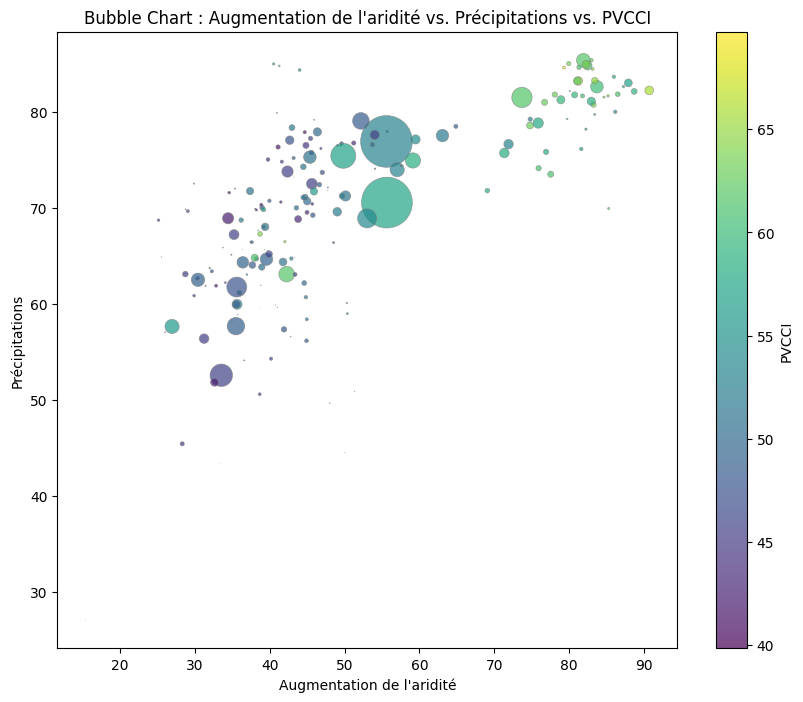

In [ ]:
# Variables
aridity_increase = data['Increasing Aridity']
precipitations = data['Rainfall']
pvcci = data['PVCCI']

# Taille des bulles
bubble_size = data['pop'] / 1000000

# Création du Bubble Chart
plt.figure(figsize=(10, 8))


# Création du Bubble Chart avec la nouvelle échelle de couleurs
plt.figure(figsize=(10, 8))
scatter = plt.scatter(aridity_increase, precipitations, s=bubble_size, c=pvcci, cmap='viridis', alpha=0.7, edgecolors="grey", linewidth=0.5)

# Ajout des axes et des étiquettes
plt.xlabel('Augmentation de l\'aridité')
plt.ylabel('Précipitations')
plt.title('Bubble Chart : Augmentation de l\'aridité vs. Précipitations vs. PVCCI')

# Ajout d'une barre de couleur pour le PVCCI
cbar = plt.colorbar(scatter)
cbar.set_label('PVCCI')

# Affichage du graphique
plt.show()



## 5 - Scatter Plot de la Corrélation entre le PVCCI et les émissions de CO2


Graphique fait par Cassandra Sénécaille

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# On prend 15 pays par ordre croissant, classés par rapport au PVCCI
top15 = data.sort_values(by='PVCCI', ascending=False).head(10)

# On choisit les données des abscisses et des ordonnées, ainsi que le texte de chaque point
# On fait une échelle de couleurs, plus le pays est concerné, plus la couleur sera froide
fig = px.scatter(top15, x='PVCCI', y='emission_CO2', color='pop',
                 title='Relation entre Population, Émissions de CO2 et PVCCI',
                 labels={'pop': 'Population', 'PVCCI': 'Indice de vulnérabilité (PVCCI)', 'emission_CO2': "émissions de CO2"},
                 color_continuous_scale=px.colors.sequential.Cividis_r,
                 text="Country")

# On centre le texte soit au-dessus des points soit en-dessous
fig.update_traces(textposition=[ 'bottom left','bottom right','bottom right','bottom center','top center',
                                'bottom center', 'top center', 'middle right', 'bottom center', 'top center'])
fig.update_traces(marker=dict(size=12))


# On montre le graphique
fig.show()



## 6 - Régression de la population en fonction de l'émission de co2 et distributions marginales


Graphique fait par Rémy Gilibert

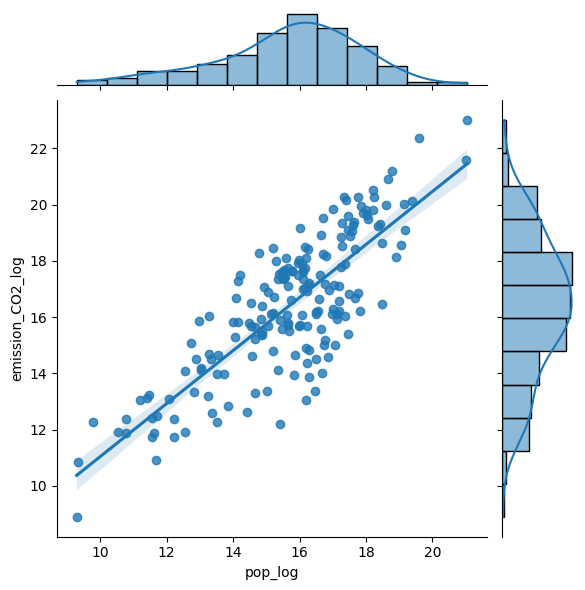

In [ ]:
import seaborn as sns
import numpy as np


# Appliquer le logarithme aux colonnes "pop" et "emission_CO2"
data['pop_log'] = np.log(data['pop'])
data['emission_CO2_log'] = np.log(data['emission_CO2'])
# Créer un jointplot avec les données normalisées
sns.jointplot(x="pop_log", y="emission_CO2_log", data=data, kind='reg')

## 7 - Top 10 des pays suivant les différents variables

Graphique fait par Cassandra Sénécaille

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Tri des données par la variable et sélection des 10 premières lignes
top_10_1 = data.sort_values(by='Flooding due to sea level rise or melting glaciers', ascending=False).head(10)
top_10_2 = data.sort_values(by='Increasing Aridity', ascending=False).head(10)
top_10_3 = data.sort_values(by='Rainfall', ascending=False).head(10)
top_10_4 = data.sort_values(by='Temperature', ascending=False).head(10)
top_10_5 = data.sort_values(by='Storms', ascending=False).head(10)
top_10_6 = data.sort_values(by='PVCCI', ascending=False).head(10)
fig = make_subplots(rows=2, cols=3, subplot_titles=["Flooding", "Increasing Aridity", "Rainfall", "Temperature", "Storms", "PVCCI"],
                        vertical_spacing=0.4)

# Graphique 1 - Flooding
trace1 = go.Scatter(x=top_10_1['Country'], y=top_10_1['Flooding due to sea level rise or melting glaciers'], mode='lines+markers', name='Flooding')
fig.add_trace(trace1, row=1, col=1)

# Graphique 2 - Increasing Aridity
trace2 = go.Scatter(x=top_10_2['Country'], y=top_10_2['Increasing Aridity'], mode='lines+markers', name='Increasing Aridity')
fig.add_trace(trace2, row=1, col=2)

# Graphique 3 - Rainfall
trace3 = go.Scatter(x=top_10_3['Country'], y=top_10_3['Rainfall'], mode='lines+markers', name='Rainfall')
fig.add_trace(trace3, row=1, col=3)

# Graphique 4 - Temperature
trace4 = go.Scatter(x=top_10_4['Country'], y=top_10_4['Temperature'], mode='lines+markers', name='Temperature')
fig.add_trace(trace4, row=2, col=1)

# Graphique 5 - Storms
trace5 = go.Scatter(x=top_10_5['Country'], y=top_10_5['Storms'], mode='lines+markers', name='Storms')
fig.add_trace(trace5, row=2, col=2)

# Graphique 6 - PVCCI
trace6 = go.Scatter(x=top_10_6['Country'], y=top_10_6['PVCCI'], mode='lines+markers', name='PVCCI')
fig.add_trace(trace6, row=2, col=3)

# Mise en forme de la figure
fig.update_layout(title_text='Top 10 des pays sur les différentes variables',
                  showlegend=False)

# Affichage de la figure
fig.show()


## 8 - Carte de la population en fonction du PVCCI


Graphique fait par Rémy Gilibert

In [ ]:
import plotly.express as px

# Remplacer les valeurs NaN dans la colonne "pop" par une valeur par défaut (par exemple, 0)
data['pop'].fillna(0, inplace=True)

# Créer la carte mondiale avec la population comme paramètre
fig = px.scatter_geo(data,
                     locations="ISO",  # Nom de la colonne des noms des pays
                     size="pop", # Paramètre de taille basé sur la population
                     title="Population par pays en fonction du PVCCI",
                     color="PVCCI",           # Paramètre de couleur basé sur la population
                     hover_name="Country",  # Afficher le nom du pays au survol
                     template="plotly",     # Utiliser le template Plotly
                     size_max=40  # Ajuster la taille maximale des bulles
                     )
fig.update_layout(
    height=750,
    width=1000
)

# Afficher la carte
fig.show()
